In [1]:
print('02_Most_Tweets_On_Subject starting.')

# who needs warnings?
import warnings
warnings.filterwarnings("ignore")

# api packages
import pyTwitter
twitter = pyTwitter.TwitterAPI()

# data packages
import sys
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

02_Most_Tweets_On_Subject starting.


In [2]:
# param args
search_term = sys.argv[1] # keyword to search for on twitter
hrs = int(sys.argv[2]) # number of hours back to look for tweets
chart_text_color = sys.argv[3] # color of the text in the chart

# pull tweets for the search_term
start_dt = datetime.today() - timedelta(hours=hrs)
print('Pulling {0} tweets for the past {1} hours.'.format(search_term, hrs))
df = twitter.get_tweets_since(search_term, start_dt)
df['username'] = df.apply(twitter.get_username, axis=1)
df['count'] = 1
df_agg = pd.DataFrame(df.groupby(by=['username'])['count'].count())
df_agg.sort_values(by=['count'], ascending=False, inplace=True)
df_agg = df_agg.iloc[0:10]
print('\nDataframe for {0} set up.\n'.format(search_term))

Pulling Clemson tweets.
| 98 complete | 150.1292 seconds elapsed |     
Dataframe for Clemson set up.



In [188]:
print('Defining chart.')
def get_xy(d):
    x = list(d.keys())
    y = list(d.values())
    return x, y

def build_sorted_bar_chart(df):
    x = list(reversed(range(len(df.index))))
    y = df['count'].values
    bar_height = 0.7

    figure(num=None, figsize=(12, 8), dpi=80, frameon=False
               , edgecolor='#000000', facecolor='#1a2028', linewidth=2)
    ax = plt.subplot()
    p1 = ax.barh(x, y, color='#1da1f2', height=bar_height)
    for a, b in zip(x, y):
            plt.text(b+0.3, a, b, ha="left", va="center", color='white', size=12)
    ax.set_facecolor('#1a2028')
    ax.set_yticks(x)
    ax.set_yticklabels(df.index, size=12)
    plt.title('Who tweeted the most about for {} in the last {} hours?'.format(search_term, hrs)
              , color=chart_text_color, size=16)
    plt.xlabel('Tweet Count', color=chart_text_color)
    plt.ylabel('User', color=chart_text_color)
    plt.tick_params(axis='x', colors=chart_text_color)
    plt.tick_params(axis='y', colors=chart_text_color)

Building chart.
Writing chart file
tab_vs_pbi.png saved to local directory.


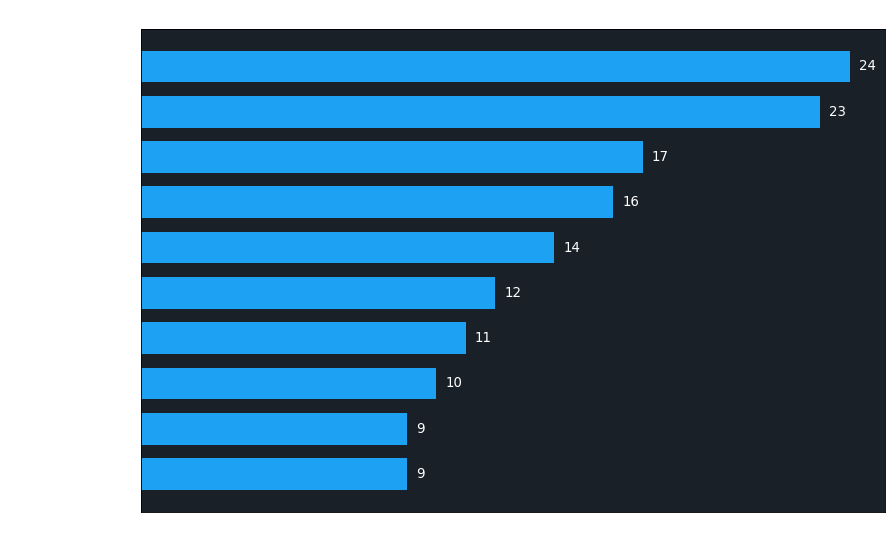

In [190]:
print('Building chart.')
build_sorted_bar_chart(df_agg)
print('Writing chart file')
plt.savefig('most_tweets_{}.png'.format(search_term))
print('most_tweets_{}.png saved to local directory.'.format(search_term))
plt.show()

In [ ]:
print('Closing.')